# INFO 3350/6350

## Lecture 01: Tokens, vectorization, and distance metrics

## To do

* Friday sections
  * Be prepared to discuss the reading in depth (Healy)
  * We'll also go over how to set up Python virtual environments
* No lecture next Monday (Labor Day)
* Extra credit for good, consistent answers on Ed
* Study groups are great for homeworks
* Questions?

## A toy example

Does anyone recognize the puzzle below? 

![](images/connections_puzzle.png)

What is the goal of this puzzle? How do you go about solving it? 

<br/>
<br/>
<br/>
<br/>

Answers: 

![](images/connections_answers.png)

## What does this have to do with this class?

One goal of humanistic inquiry and of scientific research is to compare objects, so that we can gather them into types and compare any one object to others that we observe. Think of biological species or literary genres or historical eras. But how can we measure the difference or similarity between objects that are, after all, always necessarily individual and unique?

* Measuring the *properties* of objects lets us compare those objects to one another.
  * But ... *which* properties?
 
## What is a vector?

An ordered collection of numbers that locate a point in space relative to a shared reference point (called the *origin*).

* We can also think of vectors as representing the quantified *features* of an object.
* Vectors are usually written as *row matrices*, or just as lists: $vec = [1.0, 0.5, 3.0, 1.2]$
* Vectors have as many *dimensions* as there are features of the object to represent.
  * The number of features to represent is a choice of the experiment. There is no correct choice, though some choices are better than others for a given purpose.
  * You will encounter **sparse vectors**, where most values are zero, and **dense vectors**, where most values are non-zero. 
* What is **vectorization**?
  * The process of transforming an object into its vector representation, typically by measuring some of the object's properties.

* Establishing a vector representation allows us to define a **distance metric** between objects that aren't straightforwardly spatial.
  * "Distance" is a metaphor. Ditto "similarity."
  * Nothing is, in itself, like or unlike anything else. 
    * We sometimes seek to assert that objects are similar by erasing aspects of their particularity.
  * Measuring similarity and difference are (always and only) interpretive interventions.
  
## A spatial example

Consider this map of central campus:

![](images/cornell_map.png)

**How far apart are Gates Hall (purple star) and the clock tower (orange star)?**

What do we need to know or define in order to answer this question?

* Where is each building in physical space.
  * Latitude/longitude; meters north/south and east/west of the book store; etc.
* How do we want to measure the distance between them (walking, driving, flying, tunneling, ...). Minutes or miles?

Normal, boring answer: about 0.4 miles on foot via Campus Rd and Ho Plaza, or a bit less if you cut some corners, or less than 0.3 miles if you can fly.

| Clock tower | Gates Hall |
| --- | --- | 
| ![](images/clock_tower.jpg) | ![](images/gates.jpg) |

More interesting version: How far apart are these buildings conceptually? Architecturally? Historically? 

* What are the features and metrics you would use to answer this question?
* This is a lot more like the problem of comparing texts.

## A textual example

In [1]:
text = '''\
My cat likes water.
The dog eats food.
The dog and the cat play together.
A dog and a cat meet another dog and cat.
The end.'''

# Print with sentence numbers
for line in enumerate(text.split('\n')):
    print(line)

(0, 'My cat likes water.')
(1, 'The dog eats food.')
(2, 'The dog and the cat play together.')
(3, 'A dog and a cat meet another dog and cat.')
(4, 'The end.')


Let us stipulate that we want to compare these five sentences according to their "*dogness*" and "*catness*." We care about those two aspects alone, nothing else.

Let's develop some intuitions here:

* Sentences 0 and 1 are as far apart as can be: 0 is about cats, 1 is about dogs.
* Sentence 2 lies between 0 and 1. It contains a mix of dogness and catness.
* Sentence 3 is kind of like sentence 2, but it has twice as much of both dogness and catness.
  * How different are sentences 2 and 3? (There's no objectively correct answer.)
* Sentence 4 is a zero point. It has no dogness or catness.

### Count relevant words

||**cat**|**dog**|
|---|---|---|
|**sentence**| | |
|0|1|0|
|1|0|1|
|2|1|1|
|3|2|2|
|4|0|0|

The **vector representation** of sentence 0 is `[1, 0]`. The vector representation of sentence 3 is `[2, 2]`. And so on ...

### Distance measures

How far apart are sentences 0 and 1 (and all the rest)?

#### Manhattan distance

* Also called "city block" distance. 
* Not much used, but easy to understand and to compute (which matters for very large data sets). 
* Sum of the absolute difference in each dimension.

For **sentences 0 and 1**, the Manhattan distance = |1| + |-1| = 2.

#### Euclidean distance

* Straight-line or "as the crow flies" distance. 
* Widely used in data science, but not always the best choice for textual data.

Recall the Pythagorean theorem for the hypotenuse of a triangle: $a^2 = b^2 + c^2$ or $a = \sqrt{b^2 +c^2}$.

For **sentences 0 and 1**, the Euclidean distance = $\sqrt{1^2 + 1^2} = \sqrt{2} = 1.414$.

OK, but what about the Euclidean distance between **sentence 0 and sentence 3**? Well, that distance = $\sqrt{1^2 + 2^2} = \sqrt{5} = 2.24$.

And between **sentences 2 and 3** (both balanced 50:50 between dogs and cats)? That's 1.4 again, the same as the distance between sentences 0 and 1 (which, recall, are totally divergent in dog/cat content).

An obvious improvement in this case would be to **normalize word counts by document length**.

#### Cosine distance

Maybe instead of distance, we could measure the difference in **direction** from the origin between points.

* **Sentences 0 and 1** are 90 degrees apart.
* **Sentences 2 and 3** are 0 degrees apart.
* **Sentences 0 and 1** are each 45 degrees away from **sentences 2 and 3**.

Now, recall the values of the **cosine** of an angle between 0 and 90 degrees. 

So, the cosines of the angles between sentences are:

sentences|angle|cosine
---|---|---
0 and 1|90|0
2 and 3|0|1
0 and 2|45|0.707
0 and 3|45|0.707
1 and 2|45|0.707


![](images/cosine.png)


We could then transform these cosine **similarities** into **distances** by subtracting them from 1, so that the most *dissimilar* sentences (like 0 and 1) have the greatest distance between them.

The big advantage here is that we don't need to worry about getting length normalization right. Cosine distance is often a good choice for text similarity tasks.

#### Higher dimensions

All of these metrics can be calculated in arbitrarily many dimensions. Which is good, because textual data is often very high-dimensional. Imagine counting the occurrences of each word type in a large corpus of novels or historical documents. Can easily be tens of thousands of dimensions.

## In the real world

* There's nothing wrong with any of these vectorizations and distance metrics, exactly, but they're not state of the art.
* If you've done some recent NLP work, you'll know that, at the very least, you'd want to use static word embeddings in place of raw tokens.
  * This allows you to capture the similarity of meaning between, e.g., "cat" and "kitten."
  * Word counts alone represent any two distinct word types as (entirely) separate dimensions, so "cat" and "kitten" have the same inherent relationship (none) as "cat" and "dog" or "cat" and "algebraic".
* If you were especially ambitious, you'd be looking at something like BERT or GPT-*, etc.
    * These transformer-based methods allow for *contextual* embeddings, that is, they represent a word token differently depending on the context in which it appears, so that the representation of "bank" in "my money is in the bank" is different from the the representation of "bank" in "we walked along the bank of the river."
* We'll cover both static and contextual embeddings later this semester.
* And then you might want features that correspond to aspects of a text other than the specific words it contains.
    * When was it written?
    * By *whom* was it written?
    * How long is it?
    * In what style is it written?
    * Who read it?
    * How much did it cost?
    * How many people read or reviewed it?
    * What else did its readers also read?
    * And so on ...

Here, though, we're trying to grasp the *idea* behind document similarity, on which all of these methods depend: transform text into a numeric representation of its features (often, a representation of its content or meaning), then quantify the difference or similarity between those numeric representations.

## In the problem set world

We'll dig into how, as a practical matter, we can vectorize texts and calclulate distance metrics in this week's problem set.

We'll use `scikit-learn` to implement vectorization and distance metrics. The `scikit-learn` API almost always involves *three* steps:

1. Instantiate a learning object (such as a vectorizer, regressor, classifier, etc.). This is the object that will hold the parameters of your fitted model.
1. Call the instantiated learning object's `.fit()` method, passing in your data. This allows the model to learn the optimal parameters from your data.
1. Call the fitted model's `.transform()` or `.predict()` method, passing in either the same data from the `fit` step or new data. This step uses the fitted model to generate outputs given the input data you supply.

For example:

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# get example text as one doc per line
docs = [sent for sent in text.split('\n')]

# instantiate vectorizer object
#  note setup options
vectorizer = CountVectorizer(
    vocabulary=['cat', 'dog']
)

# fit to data
vectorizer.fit(docs)

# transform docs to features
features = vectorizer.transform(docs)

# print output feature matrix
print(vectorizer.get_feature_names_out())
print(features.toarray())

['cat' 'dog']
[[1 0]
 [0 1]
 [1 1]
 [2 2]
 [0 0]]


In [3]:
features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (5, 2)>

In [4]:
vectorizer

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [5]:
# calculate distances
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
import numpy as np

print("Euclidean distances")
print(np.round(euclidean_distances(features),2))

print("\nCosine distances")
print(np.round(cosine_distances(features),2))

print("\nCosine **similarities**")
print(np.round(cosine_similarity(features),2))

Euclidean distances
[[0.   1.41 1.   2.24 1.  ]
 [1.41 0.   1.   2.24 1.  ]
 [1.   1.   0.   1.41 1.41]
 [2.24 2.24 1.41 0.   2.83]
 [1.   1.   1.41 2.83 0.  ]]

Cosine distances
[[0.   1.   0.29 0.29 1.  ]
 [1.   0.   0.29 0.29 1.  ]
 [0.29 0.29 0.   0.   1.  ]
 [0.29 0.29 0.   0.   1.  ]
 [1.   1.   1.   1.   0.  ]]

Cosine **similarities**
[[1.   0.   0.71 0.71 0.  ]
 [0.   1.   0.71 0.71 0.  ]
 [0.71 0.71 1.   1.   0.  ]
 [0.71 0.71 1.   1.   0.  ]
 [0.   0.   0.   0.   0.  ]]


As an exercise, you might try to compute these pairwise distance/similarity matrices using numpy alone. For example: 

In [6]:
def pairwise_cosine(X):
    normalized = X/(np.linalg.norm(X, axis=1, keepdims=True) + 1e-10) # (N, D) Avoid divide-by-zero errors
    return normalized @ normalized.T  # (N, D) @ (D, N) -> (N, N)

print("Cosine **similarities** (ours)")
print(np.round(pairwise_cosine(features.toarray()),2))

# Same as sklearn?
np.allclose(
    np.round(pairwise_cosine(features.toarray()),2), 
    np.round(cosine_similarity(features),2)
)


Cosine **similarities** (ours)
[[1.   0.   0.71 0.71 0.  ]
 [0.   1.   0.71 0.71 0.  ]
 [0.71 0.71 1.   1.   0.  ]
 [0.71 0.71 1.   1.   0.  ]
 [0.   0.   0.   0.   0.  ]]


True

However, there's no shame in using built-in functions like this on large datasets: if you look at the [`sklearn` source code for `pairwise`](https://github.com/scikit-learn/scikit-learn/blob/c5497b7f7/sklearn/metrics/pairwise.py#L1951), they use multithreading to improve performance. 

Euclidean distances


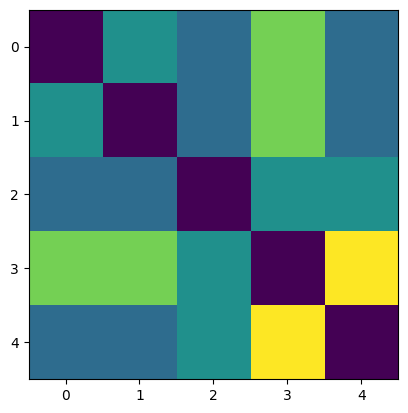

In [7]:
# FYI, two heatmap visualizations
import matplotlib.pyplot as plt
import seaborn as sns

print("Euclidean distances")

# quick and dirty
plt.imshow(euclidean_distances(features))
plt.show()

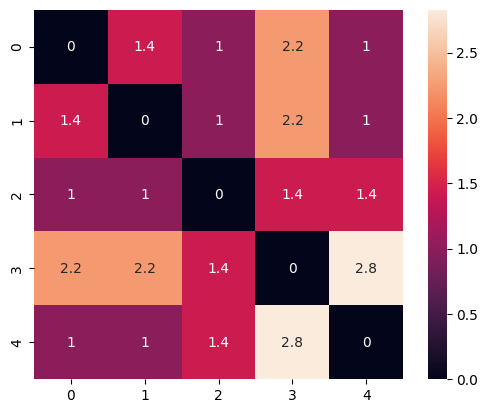

In [8]:
# prettier
sns.heatmap(
    euclidean_distances(features),
    annot=True,
    square=True
)
plt.show()

## Tokenization considerations

What is a token?

* The **smallest individually meaningful unit of a document.** Roughly, a word.
* But ... as soon as you see "meaningful," you know it's going to be a matter of interpretation.
  * *Every single thing you do in text analysis is an interpretive intervention!*
* Not all tokens are (single) words. For example:
  * **Contractions**. `"I'm"` or `"can't"`. One token or two?
  * **Phrases.** `"San Francisco"` or `"Cornell University"`. Two tokens or one?
    * These are exampled of "named entities." We'll revisit them later in the semester.
  * **Punctuation.** Count it at all? Is `"this"` the same token as `"this!"`? Is `"."` or `";"` a token on its own?
  * **Domain-specific terms.** `"@user"`, `"COVID-19"`, etc.

Tokenization is part of the more-or-less standard text-processing workflow. Other parts of that workflow might include:
  * Case regularization/folding
  * Punctuation removal
  * Lemmatization or stemming
  * Sentence segmentation
  * Stopword removal
  * and more ...
  
## State of the art

A decade ago, using raw tokens for NLP tasks was the best we could do. Today, we generally use static or contextual word *embeddings* in place of tokens. We'll talk about this at length in the second half of the course, but the underlying idea is the same. Words and embeddings are proxies for meaning (which is what we ultimately care about, but is never directly accessible to us). Embeddings are just a way to capture more of the specific meaning of a word as it is used in a given language (static) or linguistic context (contextual).

## Tokenization can be domain-specific

Note that today's reading assumed some special interests:

* Twitter(like) texts
* Sentiment as target phenomenon

So it worked hard to capture Twitter handles, hashtags, smilies, URLs, etc.

The "right" way to tokenize depends on your project, on what is meaningful *in context*.
If you have different data or different phenomena to investigate, you might tokenize differently.

## Approach 1: Split on whitespace

A simple, naïve approach, workable for quick-and-dirty work with many Western languages.

Consider the sentence:

> Cornell is a private, Ivy League university and the land-grant university for New York state.

How many tokens does this sentence contain? (count them for yourself)

In [9]:
cornell = 'Cornell is a private, Ivy League university and the land-grant university for New York state.'
tokens = cornell.split()
print(tokens)
print("Number of tokens:", len(tokens))

['Cornell', 'is', 'a', 'private,', 'Ivy', 'League', 'university', 'and', 'the', 'land-grant', 'university', 'for', 'New', 'York', 'state.']
Number of tokens: 15


Notice: `private,` `land-grant` `state.` These aren't wrong *per se*, but ...

Maybe we could do better if we just took non-space, non-puctuation strings.

In [10]:
import re
word_pattern = re.compile(r"[\w]+")
tokens_re = word_pattern.findall(cornell)
print(tokens_re)
print("Number of tokens:", len(tokens_re))

['Cornell', 'is', 'a', 'private', 'Ivy', 'League', 'university', 'and', 'the', 'land', 'grant', 'university', 'for', 'New', 'York', 'state']
Number of tokens: 16


### Regular expressions

A totally inadequate mini-introduction to an important but annoyingly complex technology.

* What is a regular expression (regex)?
  * A sequence of characters that define a search pattern.
  * That is, it's a text search or matching language.
  * Notoriously unreadable and difficult to parse by eye.
  
Consider the line above:

```
word_pattern = re.compile("[\w]+")
```

The search pattern here is any sequence of one or more (`+`) uniterrupted "word" characters (`\w` = upper- and lowercase letters, plus digits) that occur anywhere in a string. Regexes are usually "greedy," so will continue matching character by character until their condition is not met.

In [11]:
for word in ['t', 'the', 'these', "these'uns", "these ones"]:
    print(word_pattern.findall(word))

['t']
['the']
['these']
['these', 'uns']
['these', 'ones']


`re` is Python's regular expression library. `compile` prepares the regular expression for use with text inputs.

A few other useful bits of regex syntax:

* `.` (period) = any character
* `\s` = whitespace character (space, tab, newline, etc.)
* `\d` = digit
* `[abc]` = any character in the set {a, b, c}.
* `[^abc]` = negation, any character *except* a, b, or c.
* `A*` = zero or more occurrences of the character A; `+` = one or more, `?` = zero or one.
* `\A`, `\Z`, `^`, and `$` = match only at start or end of a string or line, respectively.
* `\` (backslash) = escape the next character; `\.` = period, not wildcard.

There's a lot more to this. Take a look at the code linked from today's reading, and/or consult a [regex cheat sheet](https://learnbyexample.github.io/cheatsheet/python/python-regex-cheatsheet/).

Why use regular expressions?
  * A powerful way to find/match/extract substrings from strings and texts.
  * Can use regexes to build robust custom tokenizers (as in the reading for today)

### NLTK

The Natural Language Tool Kit (NLTK) is a Python NLP library that long predates today's transformer models. It includes a bunch of tokenizers, nearly all of them extensible, that will probably perform better than whatever you can hack together for your project.

Let's try it:

In [12]:
from nltk import word_tokenize
tokens_nltk = word_tokenize(cornell)
print(tokens_nltk)
print('Number of tokens:', len(tokens_nltk))

['Cornell', 'is', 'a', 'private', ',', 'Ivy', 'League', 'university', 'and', 'the', 'land-grant', 'university', 'for', 'New', 'York', 'state', '.']
Number of tokens: 17


In [13]:
word_tokenize("can't, I'm")

['ca', "n't", ',', 'I', "'m"]

Note that NLTK treats word-terminal punctuation as a token and is smart about contractions.

## Non-English/Non-Western text

Whitespace can be a very bad approach if Western typographic conventions don't apply!

If you don't know the language:

* Ask if you should be doing the work
* Lean on libraries

### Example from the *New York Times*

In a [recent *Times* article](https://www.nytimes.com/2020/09/03/sports/soccer/premier-league-china-contract-television.html) on football broadcasting rights, we find this sentence:

**Chinese**

> 因受新型冠状病毒危机对足球和其他体育赛事的持续影响，早已面临越来越多亏损的英格兰超级足球联赛周四宣布，因为无法解决与中国合作伙伴的纠纷，已终止了其最赚钱的海外转播合同。

**English translation**

> The English Premier League, already facing mounting losses because of the continued impact of the coronavirus crisis on soccer and other sporting events, announced on Thursday that it had canceled its most lucrative overseas broadcast contract after it was unable to resolve a dispute with its Chinese partner.

Our previous tokenization strategy doesn't work well in this case:

In [14]:
# Strings
zh = '因受新型冠状病毒危机对足球和其他体育赛事的持续影响，早已面临越来越多亏损的英格兰超级足球联赛周四宣布，因为无法解决与中国合作伙伴的纠纷，已终止了其最赚钱的海外转播合同。'
en = 'The English Premier League, already facing mounting losses because of the continued impact of the coronavirus crisis on soccer and other sporting events, announced on Thursday that it had canceled its most lucrative overseas broadcast contract after it was unable to resolve a dispute with its Chinese partner.'

# Naive approach to tokenization
zh_tokens_bad = zh.split()
print(zh_tokens_bad)
print('Number of Chinese tokens:', len(zh_tokens_bad))

# English version
en_tokens = en.split()
print('Number of English tokens:', len(en_tokens))

['因受新型冠状病毒危机对足球和其他体育赛事的持续影响，早已面临越来越多亏损的英格兰超级足球联赛周四宣布，因为无法解决与中国合作伙伴的纠纷，已终止了其最赚钱的海外转播合同。']
Number of Chinese tokens: 1
Number of English tokens: 48


### The `jieba` tokenizer

See the [`jieba` project GitHub page](https://github.com/fxsjy/jieba) for documentation (in Chinese and in English). `jieba` is one of the packages we installed in our virtual environment.

In [15]:
# A better approach to tokenizing Chinese-language text
import jieba
zh_tokens_better = [token for token in jieba.cut(zh)]
print(zh_tokens_better)
print("Number of Chinese tokens:", len(zh_tokens_better))

/home/jacob/Teaching/info3350-f25/.venv/lib/python3.12/site-packages/jieba/_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.664 seconds.
Prefix dict has been built successfully.


['因受', '新型', '冠状病毒', '危机', '对', '足球', '和', '其他', '体育赛事', '的', '持续', '影响', '，', '早已', '面临', '越来越', '多', '亏损', '的', '英格兰', '超级', '足球联赛', '周四', '宣布', '，', '因为', '无法', '解决', '与', '中国', '合作伙伴', '的', '纠纷', '，', '已', '终止', '了', '其', '最', '赚钱', '的', '海外', '转播', '合同', '。']
Number of Chinese tokens: 45


### Tokenization today
As you might know, LLMs also use tokenizers to convert strings into digestible, numerical data. These tokenizers are much more complex than what we've been describing here. In fact, they tend to employ something like the NLTK tokenizer above as a "pre-tokenizer" prior to actually tokenizing the text for the model. 

We'll talk about common tokenization techniques used by contemporary LLMs later in the course.